# Desafios:
Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

In [46]:
import pandas as pd

In [47]:
dados = pd.read_csv('../Dados/UF_AnoMesAtend_ValorTotal.csv', encoding="ISO-8859-1", skiprows=3, sep=";", 
                    skipfooter=12, thousands=".", decimal=",")
dados.head()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


### Tratamento I:
- Adicionar média para o Acre 2020/Ago
- Selecionar colunas utilizaveis
- Ordenar por total e remover a coluna total
- Setar UF como index
- Remover os numeros na frente dos estados em Unidade da Federação

#### Adicionar média para o Acre 2020/Ago

In [48]:
import numpy as np

In [49]:
tratamento = dados.T.iloc[:, 1]
tratamento.replace('-', np.nan, inplace = True)
tratamento.fillna(0, inplace = True)

In [50]:
# Valor a ser inserido no mes de 2020/Ago do acre
valor = round(tratamento.tail(-1).astype('float').mean(), 2)
valor

3015541.5

In [51]:
# Inserção do valor na coluna
dados['2020/Ago'] = dados['2020/Ago'].replace('-', valor)
# Conversao da coluna para float
dados['2020/Ago'] = dados['2020/Ago'].astype('float')
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,3015541.50,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


#### Selecionar colunas utilizaveis

In [52]:
interesse = dados.mean().index.tolist()
interesse.insert(0, 'Unidade da Federação')
dados = dados[interesse]
dados.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,3015541.50,4.206680e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


#### Ordenar por total e remover a coluna total

In [56]:
dados = dados.sort_values('Total', ascending = False)
dados.drop('Total', 1, inplace = True)
dados.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
19,35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
16,31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
20,41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
22,43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
18,33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


#### Setar UF como index

In [57]:
dados.set_index('Unidade da Federação', inplace = True)
dados.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


#### Remover os numeros na frente dos estados em Unidade da Federação

In [61]:
dados.index = dados.index.str[3:]
dados.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


# Desafio 01 e 2: 
- Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.
- Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_style('darkgrid')
sns.set_palette('Accent')

In [66]:
selecao = dados.columns[6:]
interesse = dados[selecao]
interesse.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,5.375967e+07,5.639165e+07,5.623376e+07,5.791017e+07,5.959212e+07,5.756574e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,4.410293e+07,4.434852e+07,4.248794e+07,4.306646e+07,4.455331e+07,4.135151e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


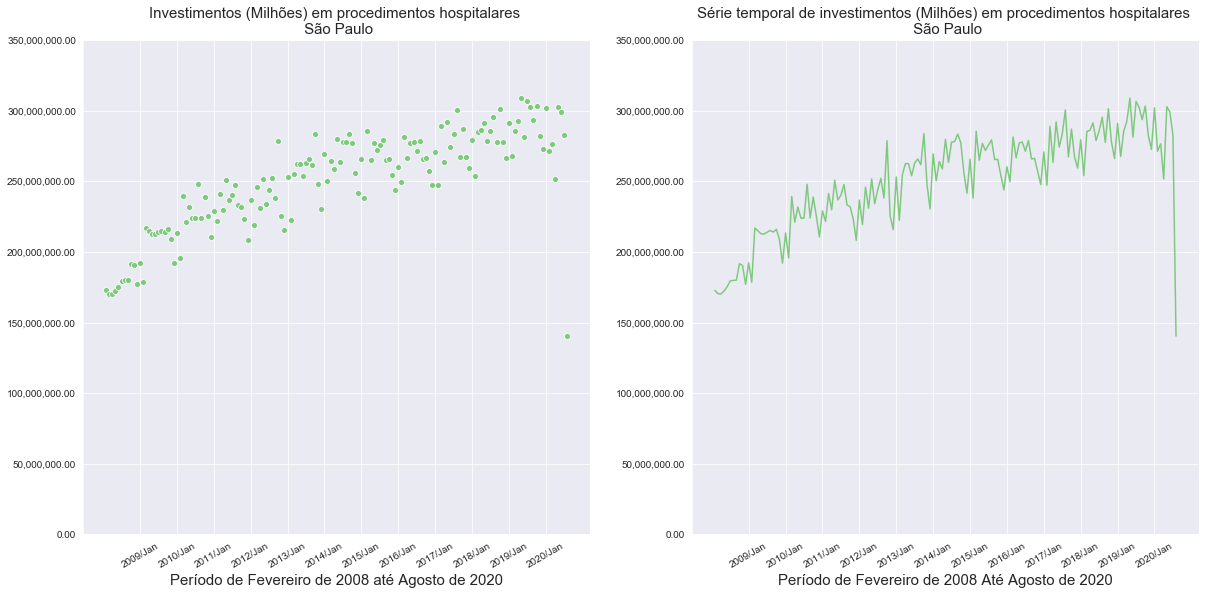

In [148]:
plt.figure(figsize=(20,20))
plt.subplot(221)
ax = sns.scatterplot(data = interesse.T, y = 'São Paulo', x = interesse.T.index, ci = 0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('')
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 11))
ax.set_ylim(0, 350000000)
plt.xticks(rotation = 30)
ax.set_title('Investimentos (Milhões) em procedimentos hospitalares \n São Paulo', fontsize = 15)
ax.set_xlabel('Período de Fevereiro de 2008 até Agosto de 2020', fontsize = 15)

plt.subplot(222)
ax = sns.lineplot(data = interesse.T, y = 'São Paulo', x = interesse.T.index, sort = False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 11))
plt.xticks(rotation = 30)
ax.set_ylim(0, 350000000)
ax.set_ylabel('')
ax.set_title('Série temporal de investimentos (Milhões) em procedimentos hospitalares \n São Paulo', fontsize=15)
ax.set_xlabel('Período de Fevereiro de 2008 Até Agosto de 2020', fontsize=15)
plt.show()

Podemos verificar, que existe uma certa sazonalidade nos dados, com picos e quedas em datas que aparentam sempre serem as mesmas.<br>
Os dados de Agosto, provavelmente nao foram todos adicionados ainda, pois em comparação com os meses anteriores, está muito abaixo do que geralmente é investido (seguindo as linha, no meio do ano existe alguns picos